Saving iris_like_dataset.csv to iris_like_dataset (3).csv
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


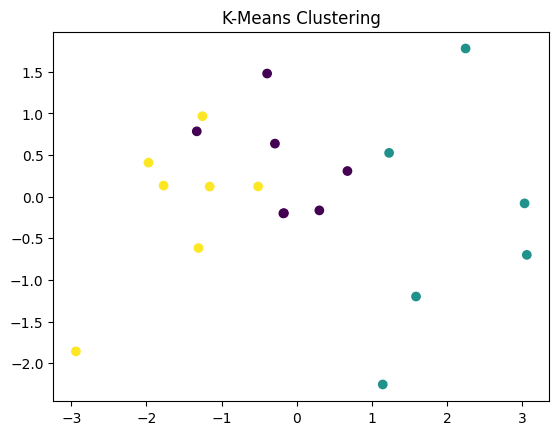

K-Means Silhouette Score: 0.20967528874065441
K-Means Davies-Bouldin Score: 1.1536427804219167
K-Means Inertia: 33.6753963707729


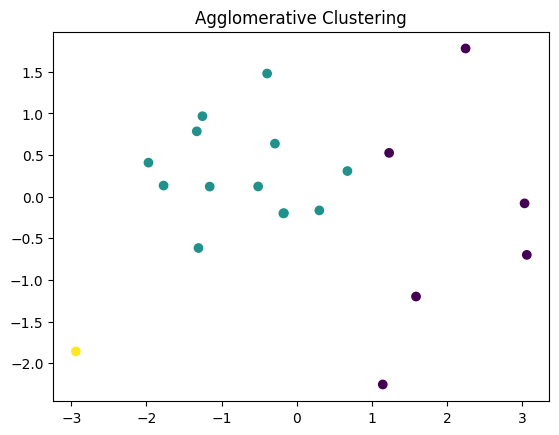

Agglomerative Silhouette Score: 0.3493523614679108
Agglomerative Davies-Bouldin Score: 0.74434408415811


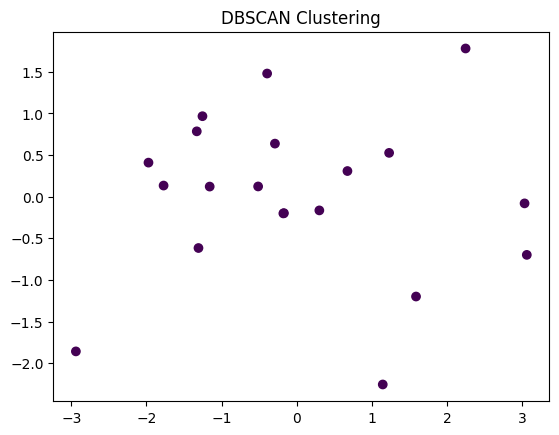

DBSCAN found 0 clusters
DBSCAN did not find enough clusters to compute Silhouette and Davies-Bouldin scores.

Clustering Performance Comparison:

                        KMeans  Agglomerative DBSCAN
Silhouette Score      0.209675       0.349352    N/A
Davies-Bouldin Score  1.153643       0.744344    N/A

Clustering Performance Comparison:

                        KMeans  Agglomerative DBSCAN
Silhouette Score      0.209675       0.349352    N/A
Davies-Bouldin Score  1.153643       0.744344    N/A


<ipython-input-4-41f57726ffe6>:104: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results_df.replace("N/A", np.nan, inplace=True)


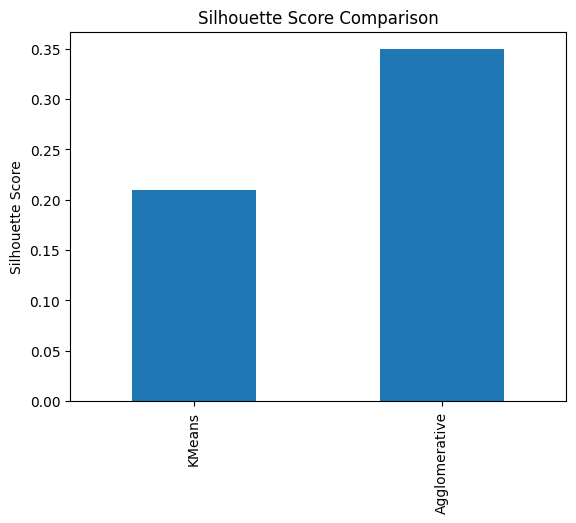

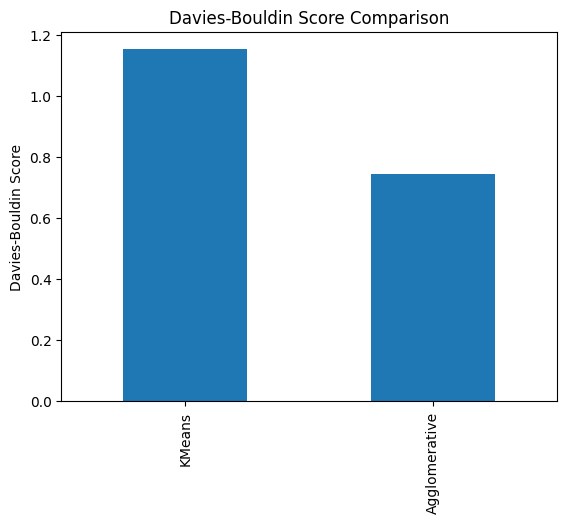

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

from google.colab import files
uploaded= files.upload()
df = pd.read_csv('iris_like_dataset.csv')


print(df.head())


X = df.drop(columns=['species'], errors='ignore')


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()


n_clusters = 3


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X_pca, kmeans_labels, "K-Means Clustering")
print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, kmeans_labels)}")
print(f"K-Means Davies-Bouldin Score: {davies_bouldin_score(X_scaled, kmeans_labels)}")
print(f"K-Means Inertia: {kmeans.inertia_}")


agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_labels = agglo.fit_predict(X_scaled)
plot_clusters(X_pca, agglo_labels, "Agglomerative Clustering")
print(f"Agglomerative Silhouette Score: {silhouette_score(X_scaled, agglo_labels)}")
print(f"Agglomerative Davies-Bouldin Score: {davies_bouldin_score(X_scaled, agglo_labels)}")


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


plot_clusters(X_pca, dbscan_labels, "DBSCAN Clustering")


n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN found {n_clusters_dbscan} clusters")


results = {
    'KMeans': [silhouette_score(X_scaled, kmeans_labels), davies_bouldin_score(X_scaled, kmeans_labels)],
    'Agglomerative': [silhouette_score(X_scaled, agglo_labels), davies_bouldin_score(X_scaled, agglo_labels)]
}


if n_clusters_dbscan > 1:
    results['DBSCAN'] = [silhouette_score(X_scaled, dbscan_labels), davies_bouldin_score(X_scaled, dbscan_labels)]
    print(f"DBSCAN Silhouette Score: {results['DBSCAN'][0]}")
    print(f"DBSCAN Davies-Bouldin Score: {results['DBSCAN'][1]}")
else:
    print("DBSCAN did not find enough clusters to compute Silhouette and Davies-Bouldin scores.")
    results['DBSCAN'] = ["N/A", "N/A"]


results_df = pd.DataFrame(results, index=['Silhouette Score', 'Davies-Bouldin Score'])
print("\nClustering Performance Comparison:\n")
print(results_df)


if "N/A" not in results_df.loc['Silhouette Score'].values:
    results_df.loc['Silhouette Score'].plot(kind='bar', title='Silhouette Score Comparison')
    plt.show()

if "N/A" not in results_df.loc['Davies-Bouldin Score'].values:
    results_df.loc['Davies-Bouldin Score'].plot(kind='bar', title='Davies-Bouldin Score Comparison')
    plt.show()

results_df = pd.DataFrame(results, index=['Silhouette Score', 'Davies-Bouldin Score'])
print("\nClustering Performance Comparison:\n")
print(results_df)


results_df.replace("N/A", np.nan, inplace=True)


results_df.loc['Silhouette Score'].dropna().plot(kind='bar', title='Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.show()

results_df.loc['Davies-Bouldin Score'].dropna().plot(kind='bar', title='Davies-Bouldin Score Comparison')
plt.ylabel('Davies-Bouldin Score')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/dataset.csv'